# Problem statement

The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. Some passengers were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following:

Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
Sex: Sex
Age: Age in years
Sibsp: # of siblings / spouses aboard the Titanic
Parch: # of parents / children aboard the Titanic
Ticket: Ticket number
Fare: Passenger fare
Cabin: Cabin number
Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
Target class: Survived: Survival (0 = No, 1 = Yes)

# step-1 importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing dataset

In [74]:
training_set=pd.read_csv('Train_Titanic.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# step 2: explore dataset

In [75]:
survived=training_set[training_set['Survived']==1]
no_survived= training_set[training_set['Survived']==0]

In [76]:
print('Total=',len(training_set))

print('num of survived=',len(survived))
print('num of died=',len(no_survived))

Total= 891
num of survived= 342
num of died= 549


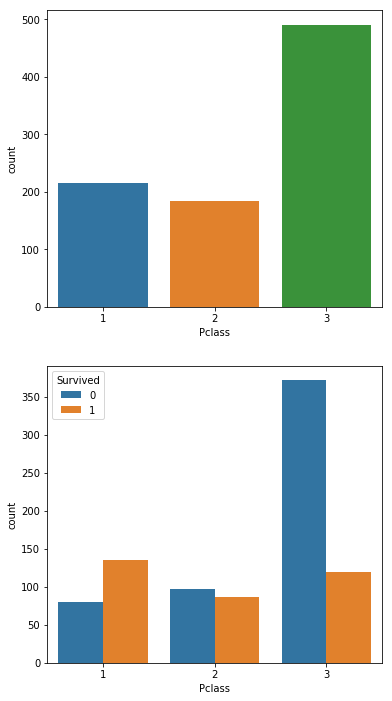

In [77]:
# Bar Chart to indicate the number of people survived based on their class
# If you are a first class, you have a higher chance of survival
plt.figure(figsize=[6,12])
plt.subplot(211)

sns.countplot(x='Pclass',data=training_set)
plt.subplot(212)
sns.countplot(x='Pclass', hue='Survived',data=training_set)

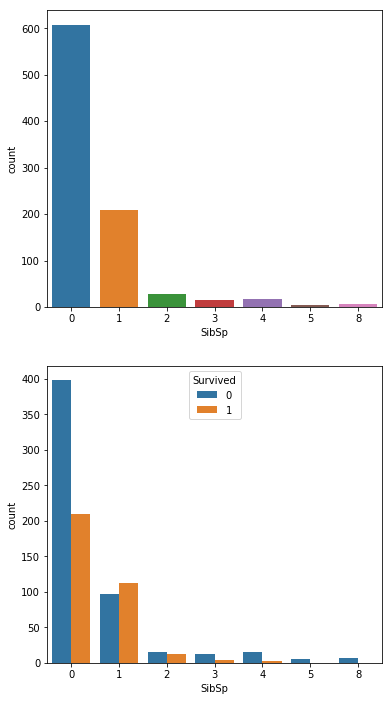

In [78]:
# Bar Chart to indicate the number of people survived based on their siblings status
# If you have 1 siblings (SibSp = 1), you have a higher chance of survival compared 

plt.figure(figsize=[6,12])
plt.subplot(211)

sns.countplot(x='SibSp',data=training_set)
plt.subplot(212)
sns.countplot(x='SibSp', hue='Survived',data=training_set)

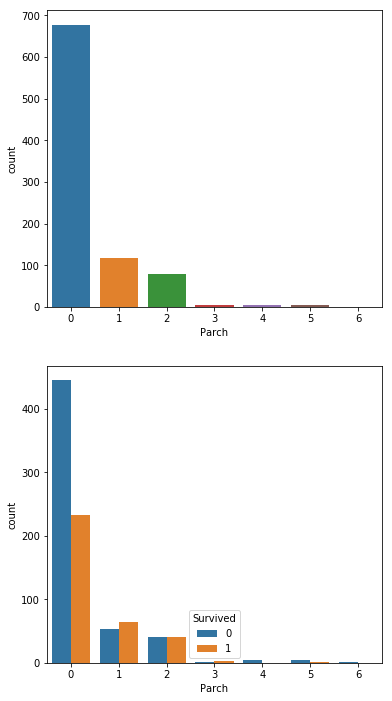

In [79]:
# Bar Chart to indicate the number of people survived based on their Parch status (how many parents onboard)
# If you have 1, 2, or 3 family members (Parch = 1,2), you have a higher chance of survival compared to being alone (Parch = 0)

plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Parch', data=training_set)
plt.subplot(212)
sns.countplot(x = 'Parch', hue = 'Survived', data=training_set)

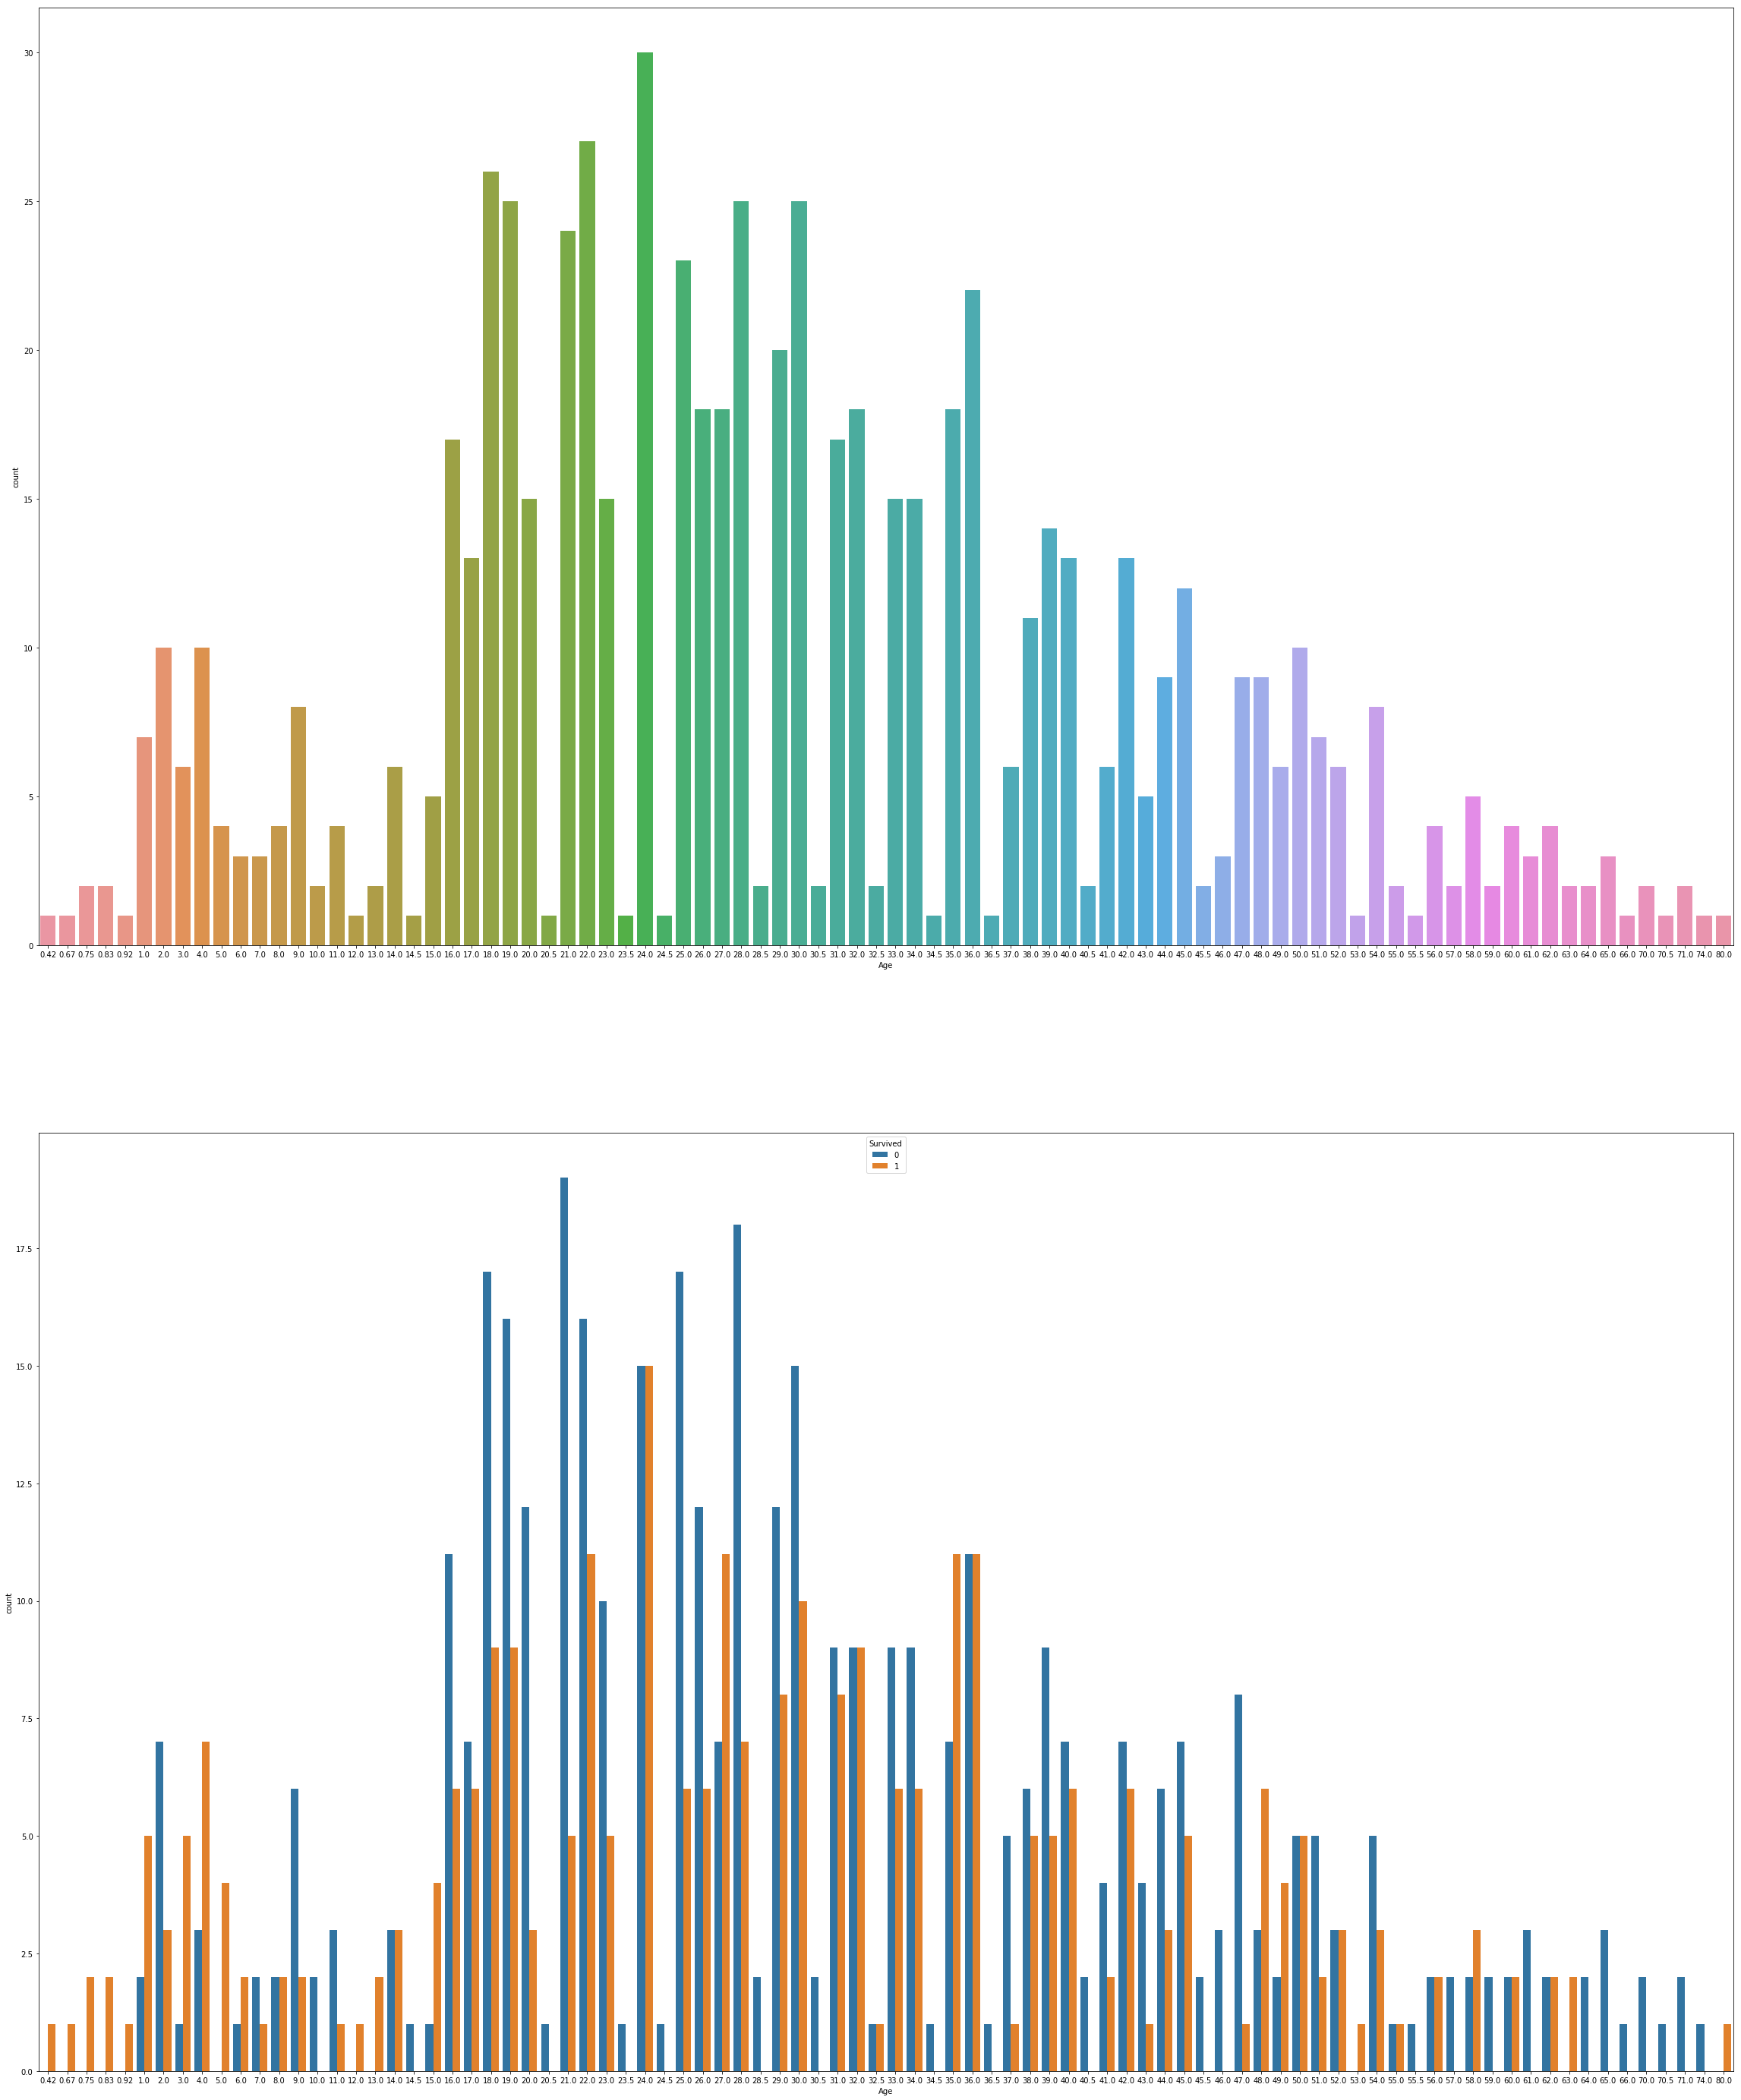

In [80]:
plt.figure(figsize=[40,50])
plt.subplot(211)
sns.countplot(x = 'Age', data=training_set)
plt.subplot(212)
sns.countplot(x = 'Age', hue = 'Survived', data=training_set)

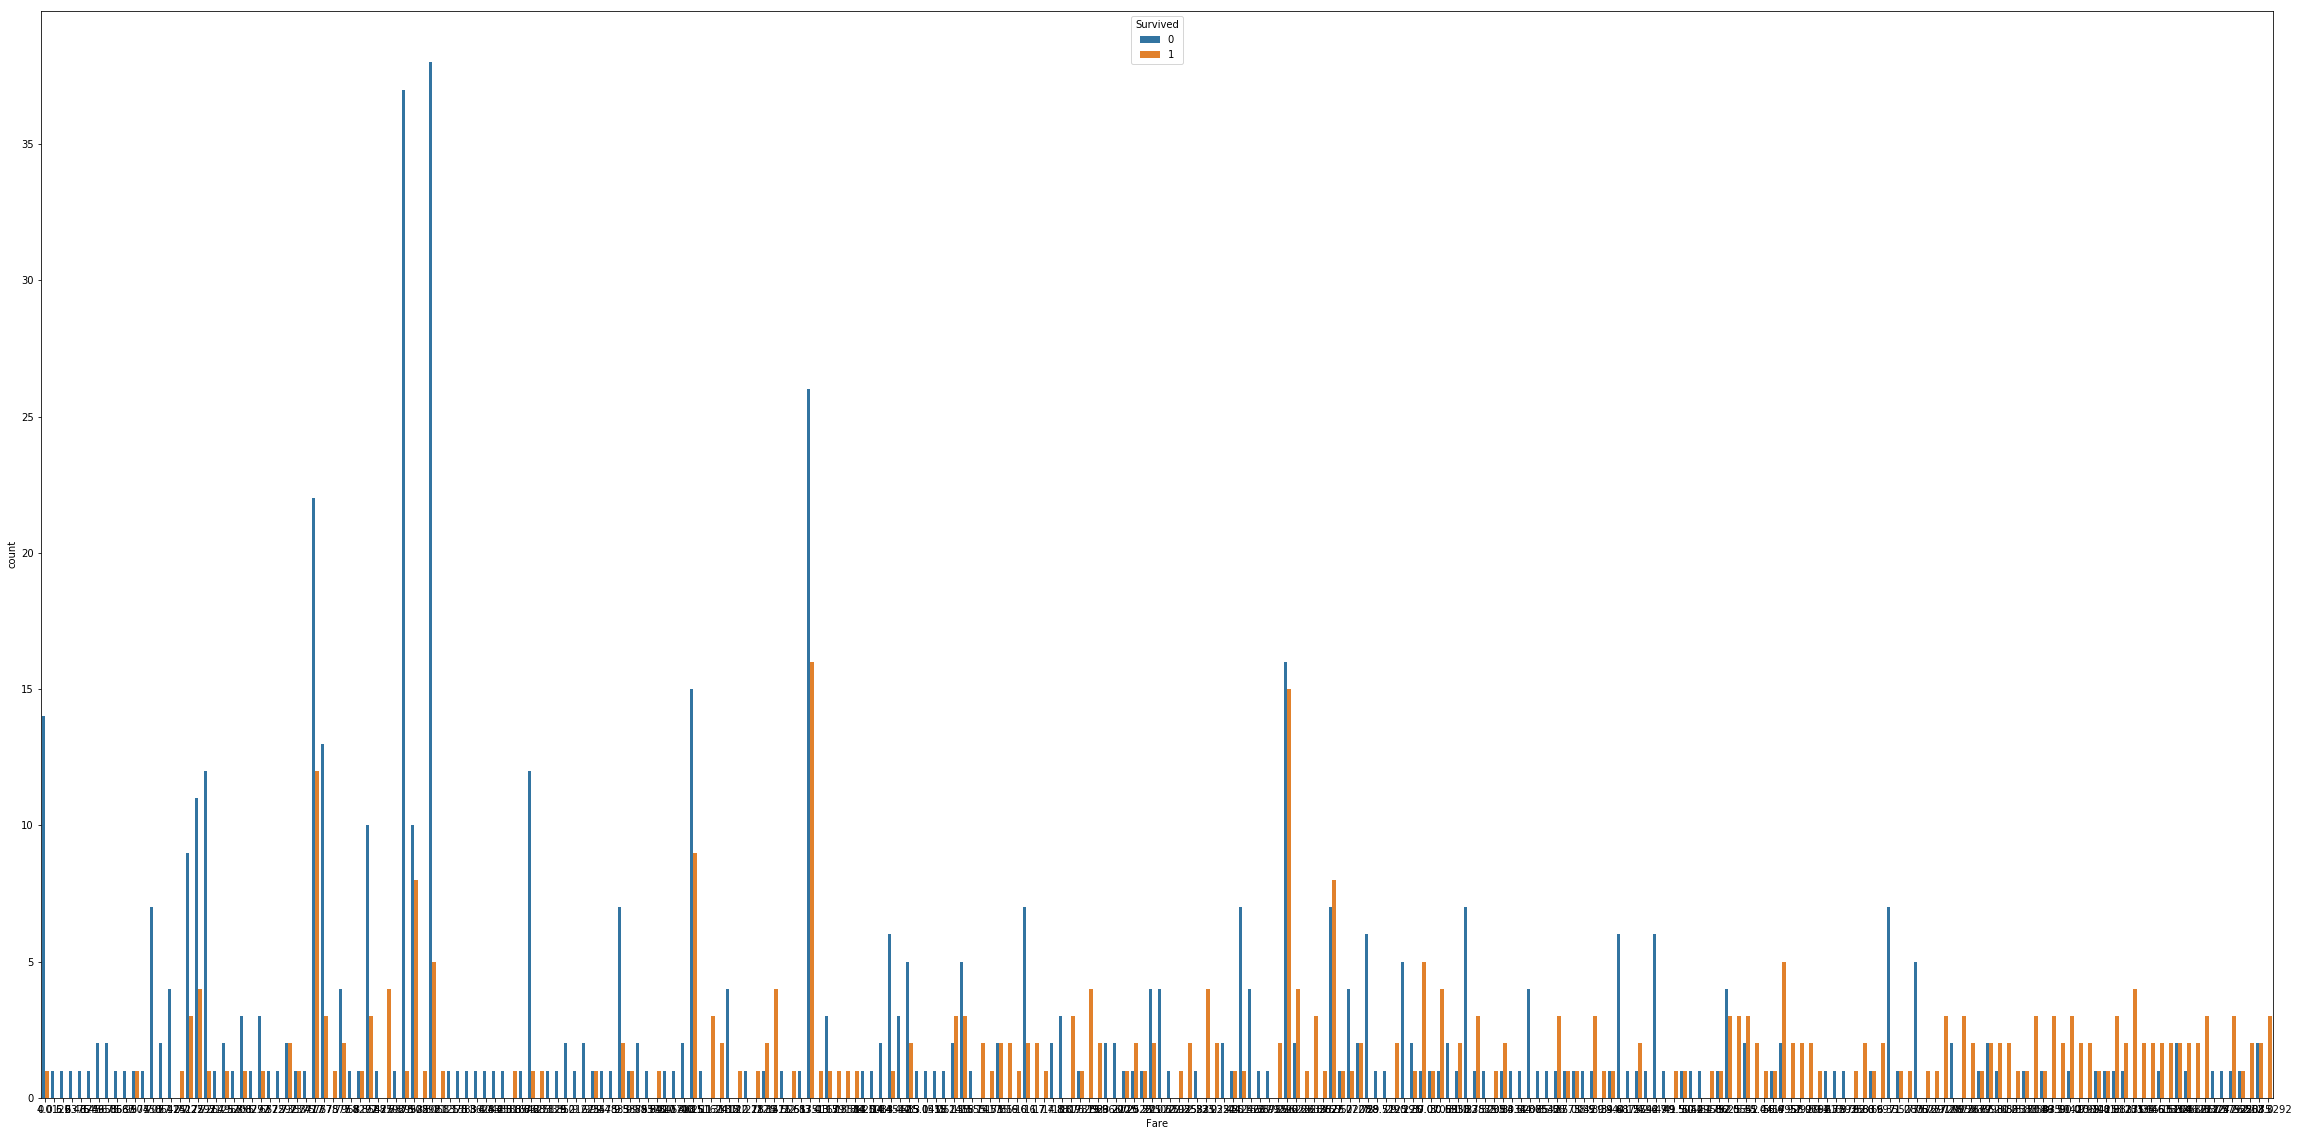

In [81]:
# Bar Chart to indicate the number of people survived based on their fare
# If you pay a higher fare, you have a higher chance of survival
plt.figure(figsize=(40,20))
sns.countplot(x = 'Fare', hue = 'Survived', data=training_set)

# preparing the data for cleaning

In [82]:
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

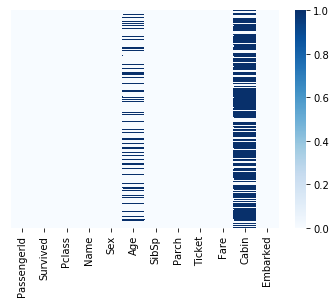

In [83]:
sns.heatmap(training_set.isnull(),yticklabels=False,cbar=True,cmap='Blues')

In [84]:
training_set.drop(['Name','Cabin','Embarked','Ticket','PassengerId'],axis=1,inplace=True)

In [85]:
training_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


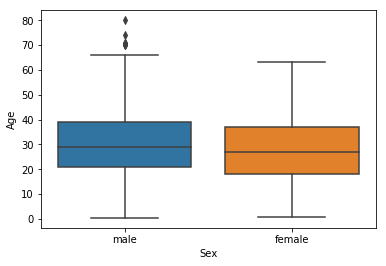

In [86]:
sns.boxplot(x='Sex',y='Age',data=training_set)

In [87]:
def Fill_Age(data):
    age=data[0]
    sex=data[1]
    
    if pd.isnull(age):
        if sex is 'male':
            return 29
        else: 
            return 25
    else:
        return age
        

In [88]:
training_set['Age']=training_set[['Age','Sex']].apply(Fill_Age,axis=1)

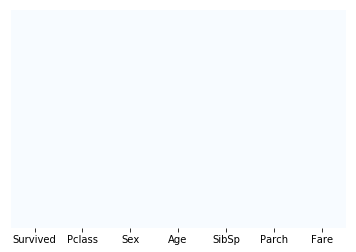

In [89]:
sns.heatmap(training_set.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [90]:
training_set.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [92]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [93]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [94]:
training_set.Sex= enc.fit_transform(training_set.Sex)

In [95]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


# step4 : Model Training

In [96]:
#rearranging the columns
training_set=training_set.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]

In [97]:
training_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [98]:
X=training_set.iloc[:,:-1]
y=training_set.Survived

In [103]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold

In [100]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.2,random_state=10)

In [101]:
# Model selections

In [108]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#  step-5: Model Testing

In [109]:
y_predict =model.predict(X_test)
pd.crosstab(y_test,y_predict)

col_0,0,1
Survived,,
0,104,13
1,19,43


In [111]:
from sklearn.metrics import confusion_matrix,classification_report

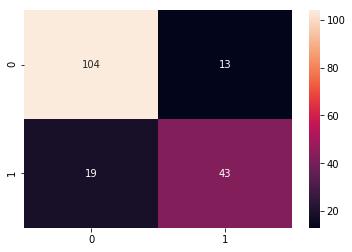

In [116]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot= True,fmt='d')

In [113]:
classification_report(y_test,y_predict)

'             precision    recall  f1-score   support\n\n          0       0.85      0.89      0.87       117\n          1       0.77      0.69      0.73        62\n\navg / total       0.82      0.82      0.82       179\n'